In [1]:
%matplotlib inline


# Regresión Logística

Sobre el dataset definido se toma el 20% de los ejemplos para prueba, y se muestran los efectos de la variación del parámetro de regualrización C. 


Automatically created module for IPython interactive environment
Calculando ...
Tardó 0.108s


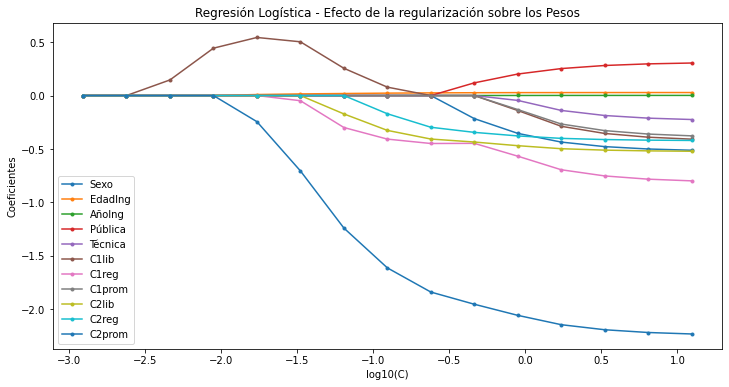

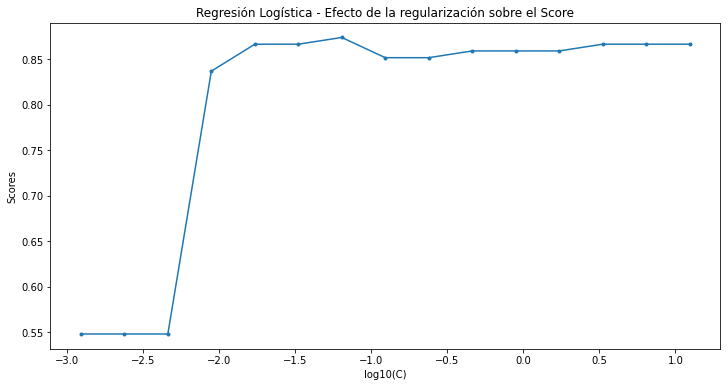

In [159]:
print(__doc__)


# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from time import time
from numpy import genfromtxt
from sklearn import linear_model
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.svm import l1_min_c

# np.savetxt('myfile.csv', X, delimiter=',')
my_data = genfromtxt('dataset - sinnulos - simple.csv', dtype=int, delimiter=';')

X = my_data[:,:11] #no toma el 11
y = my_data[:,11]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#print(X_train[0:10,:])
#print(X_test[0:10,:])

# 
print("Calculando ...")
start = time()
cs = l1_min_c(X_train, y_train, loss='log') * np.logspace(2, 6, 15)
clf = linear_model.LogisticRegression(penalty='l1', max_iter=100000,C=10, solver='liblinear')
#clf.fit(X_train, y_train)
#score = clf.score(X_test, y_test)
#print(score)

coefs_ = []
scores = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    coefs_.append(clf.coef_.ravel().copy())
    scores.append(score)
print("Tardó %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.figure(1,figsize=(12,6))
plt.plot(np.log10(cs), coefs_, marker='.')
ymin, ymax = plt.ylim()
plt.xlabel('log10(C)')
plt.ylabel('Coeficientes')
plt.title('Regresión Logística - Efecto de la regularización sobre los Pesos')
plt.axis('tight')
plt.legend(('Sexo',	'EdadIng',	'AñoIng',	'Pública',	'Técnica',	'C1lib',	'C1reg',	'C1prom',	'C2lib',	'C2reg',	'C2prom'), loc="best", fontsize='medium')
plt.show()
print(" ")


plt.figure(2,figsize=(12,6))
plt.plot(np.log10(cs), scores, marker='.')
ymin, ymax = plt.ylim()
plt.xlabel('log10(C)')
plt.ylabel('Scores')
plt.title('Regresión Logística - Efecto de la regularización sobre el Score')
plt.axis('tight')

plt.show()



